ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    name = 'STARFLAG'; fo

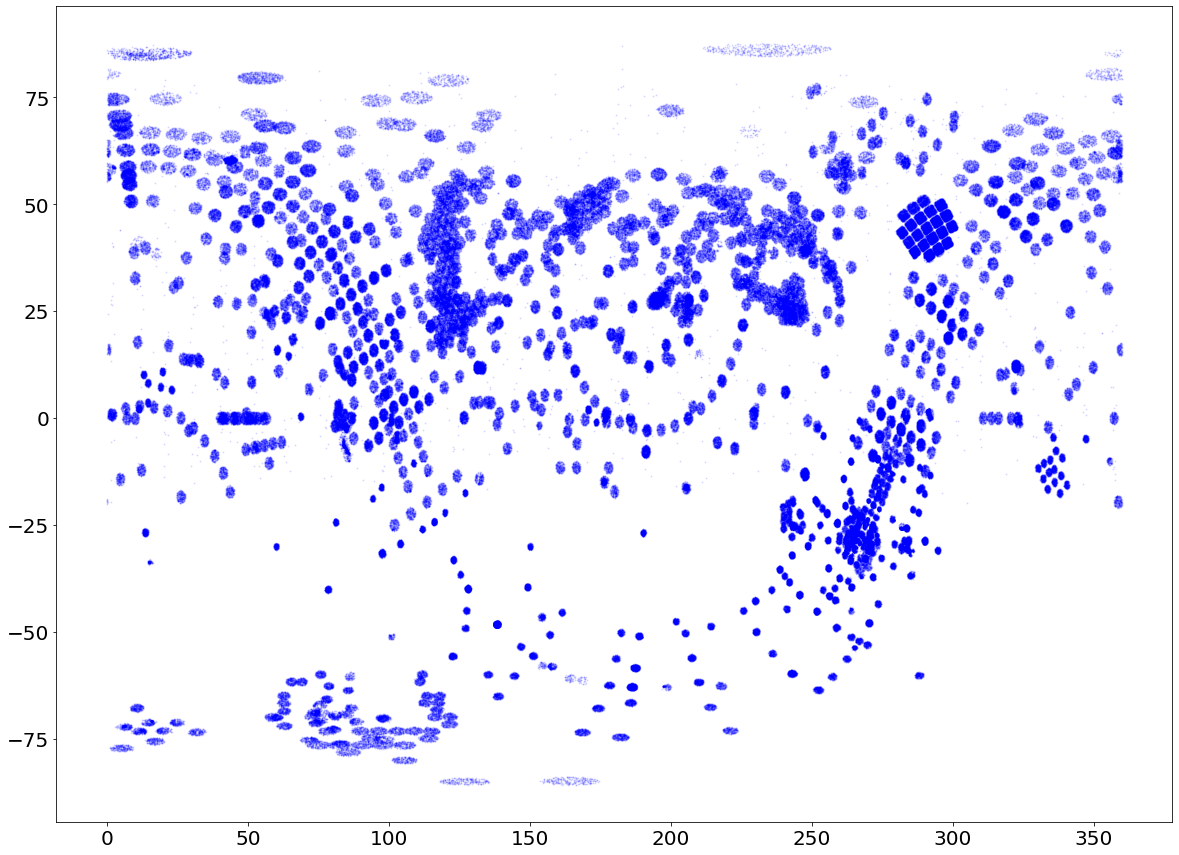

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

def bell_curve(x,a,b,c):
    return a*np.exp((-(x-b)**2)/2*(c**2))

# READ IN FITS FILES
star_hdus = fits.open('allStarLite-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolean Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]

gd2 = (np.bitwise_and(star['aspcapflag'],badbits)==0)& (np.bitwise_and(star['starflag'],suspectbits)==0)&(star['GLAT']>=-1)&(star['GLAT']<=1)
good2 = np.where(gd2)[0]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

In [2]:
def MCFit_2(function, x,y, x_err,y_err,p0): #where function can = linear and gausian
    a = list()
    b = list()
    iters = 100 
    for i in range(iters):
        weights_y = np.random.randn(len(y))
        weights_x = np.random.randn(len(x))
        y_adj = y + y_err*weights_y
        x_adj = x  + x_err*weights_x
        params, other = opt.curve_fit(function, x_adj, y_adj,p0=p0)
        a.append(params[0])
        b.append(params[1])
        print(params)
    return a, b

def MCFit_3(function, x, y, x_err, y_err, p0): #where function can = poly2 and lorentzian cauchy
    a = list()
    b = list()
    c = list()
    iters = 100 
    for i in range(iters):
        weights_y = np.random.randn(len(y))
        weights_x = np.random.randn(len(x))
        y_adj = y + y_err*weights_y
        x_adj = x  + x_err*weights_x
        params, other = opt.curve_fit(function, x_adj, y_adj,p0=p0)
        a.append(params[0])
        b.append(params[1])
        c.append(params[2])
        print(params)
    return a, b, c

def MCFit_4(function,x,y,x_err,y_err, p0): #where function can = poly3, exponential, cosfit, logfit, and sigmiod
    a = list()
    b = list()
    c = list()
    d = list()
    iters = 100
    for i in range(iters):
        weights_y = np.random.randn(len(y))
        weights_x = np.random.randn(len(x))
        y_adj = y + y_err*weights_y
        x_adj = x  + x_err*weights_x
        params, other = opt.curve_fit(function, x_adj, y_adj, p0=p0)
        a.append(params[0])
        b.append(params[1])
        c.append(params[2])
        d.append(params[3])
        print(params)   
    return a, b, c, d
    

# A)

<ipython-input-1-7e3abc433d82>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


[ 2.64993538e+00  5.86610162e-01 -1.37316150e+03 -1.67443637e+01]
[ 2.64957966e+00  6.91062766e-01 -1.61612710e+03 -1.71806385e+01]
[ 2.64852095e+00  6.79744089e-01 -1.58997638e+03 -1.71282406e+01]
[ 2.65082940e+00  5.72883777e-01 -1.34185312e+03 -1.66870427e+01]
[ 2.64021616e+00  7.84383714e-01 -1.83924341e+03 -1.74375212e+01]
[ 2.66344050e+00  6.59269829e-01 -1.53703049e+03 -1.71639883e+01]
[ 2.66487875e+00  7.10327569e-01 -1.65692449e+03 -1.73727217e+01]
[ 2.64590646e+00  6.10619000e-01 -1.42985229e+03 -1.68209096e+01]
[ 2.65852033e+00  6.59290726e-01 -1.53931049e+03 -1.71235224e+01]
[ 2.65810911e+00  6.78569706e-01 -1.58564402e+03 -1.71958736e+01]
[ 2.67084689e+00  6.83851597e-01 -1.58847215e+03 -1.73269817e+01]
[ 2.66050070e+00  6.17447808e-01 -1.44085938e+03 -1.69663272e+01]
[ 2.64672872e+00  7.50610367e-01 -1.76016289e+03 -1.73693973e+01]
[ 2.65966097e+00  6.61690621e-01 -1.54599768e+03 -1.71402997e+01]
[ 2.64251352e+00  7.05085383e-01 -1.65492520e+03 -1.71692206e+01]
[ 2.661052

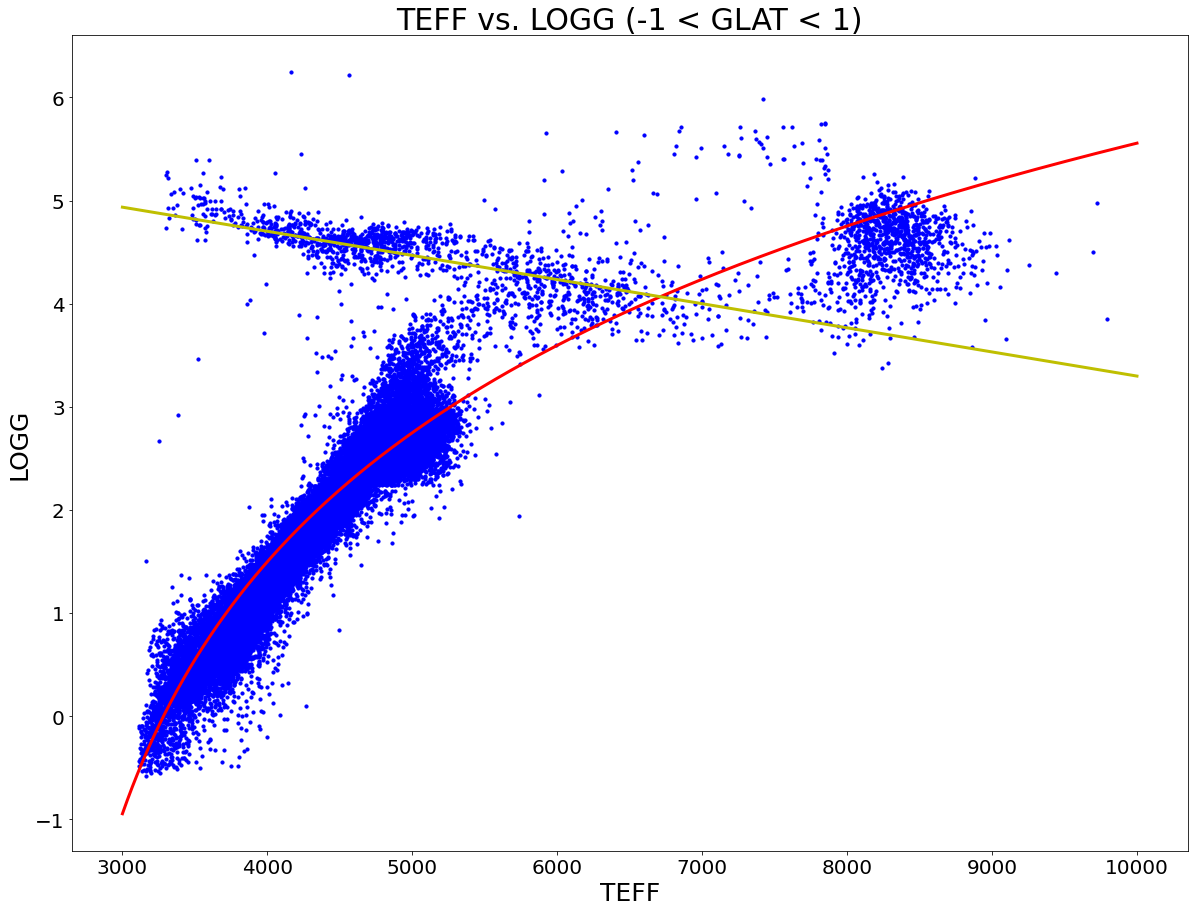

In [3]:
import numpy as np
from scipy.optimize import curve_fit

mask_a = (np.absolute(star['GLAT']) < 1.0) & (star['TEFF']>0) & (star['LOGG']>-1000)
mask_a1 = (np.absolute(star['GLAT']) < 1.0) & (star['TEFF']>0) & (star['LOGG']>3.75) & (star['TEFF']<7000)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][mask_a],star['LOGG'][mask_a],s=10,c='b')

ax.set_xlabel('TEFF', size = 25)
ax.set_ylabel('LOGG', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('TEFF vs. LOGG (-1 < GLAT < 1)', size = 30)

#plotting line of best fit, in this case, a log fit 
xlin = np.linspace(3000,10000,10000)
#log fit
a, b, c, d = MCFit_4(logfit, star['TEFF'][mask_a], star['LOGG'][mask_a],star['TEFF_ERR'][mask_a],star['LOGG_ERR'][mask_a],[1,1,1,1])
ax.plot(xlin, logfit(xlin, np.mean(a),np.mean(b),np.mean(c),np.mean(d)), c = 'r',linewidth=3)    
#linear
m,b = MCFit_2(linear,star['TEFF'][mask_a1], star['LOGG'][mask_a1],star['TEFF_ERR'][mask_a1],star['LOGG_ERR'][mask_a1],[1,1])
ax.plot(xlin, linear(xlin, np.mean(m),np.mean(b)), c = 'y',linewidth=3)    

plt.show()

               

a) The paramters are printed above.

b) The function that fits the data the best is a log fit. 

c) Yes, there is a second population that can be graphed with a linear fit, as shown above. 

# B)

[-0.08079645 -0.30668934  0.03275861]
[-0.08037359 -0.30623714  0.03287272]
[-0.08067639 -0.30677936  0.03278267]
[-0.08022912 -0.30636592  0.03278697]
[-0.08054652 -0.30657645  0.03268947]
[-0.08008571 -0.30633013  0.03266962]
[-0.08065536 -0.30668568  0.03278216]
[-0.08067403 -0.30650576  0.03285591]
[-0.08016842 -0.30639149  0.03277387]
[-0.08037051 -0.30646485  0.03266583]
[-0.08039935 -0.30643089  0.03278569]
[-0.08123289 -0.30707168  0.03276285]
[-0.08144511 -0.30717329  0.03277102]
[-0.0812056  -0.30709921  0.03271657]
[-0.08045063 -0.30679     0.03270971]
[-0.08003994 -0.30599048  0.03280784]
[-0.08079975 -0.30688064  0.03270949]
[-0.08163691 -0.30740911  0.03278873]
[-0.08080946 -0.30652327  0.03285821]
[-0.08049232 -0.30642659  0.03279039]
[-0.08137066 -0.30713659  0.03265044]
[-0.0799636  -0.30615581  0.03281451]
[-0.08071784 -0.30677753  0.03278186]
[-0.07980282 -0.30616521  0.03276332]
[-0.08086175 -0.3069468   0.03277504]
[-0.08140089 -0.30759824  0.03269043]
[-0.08075626

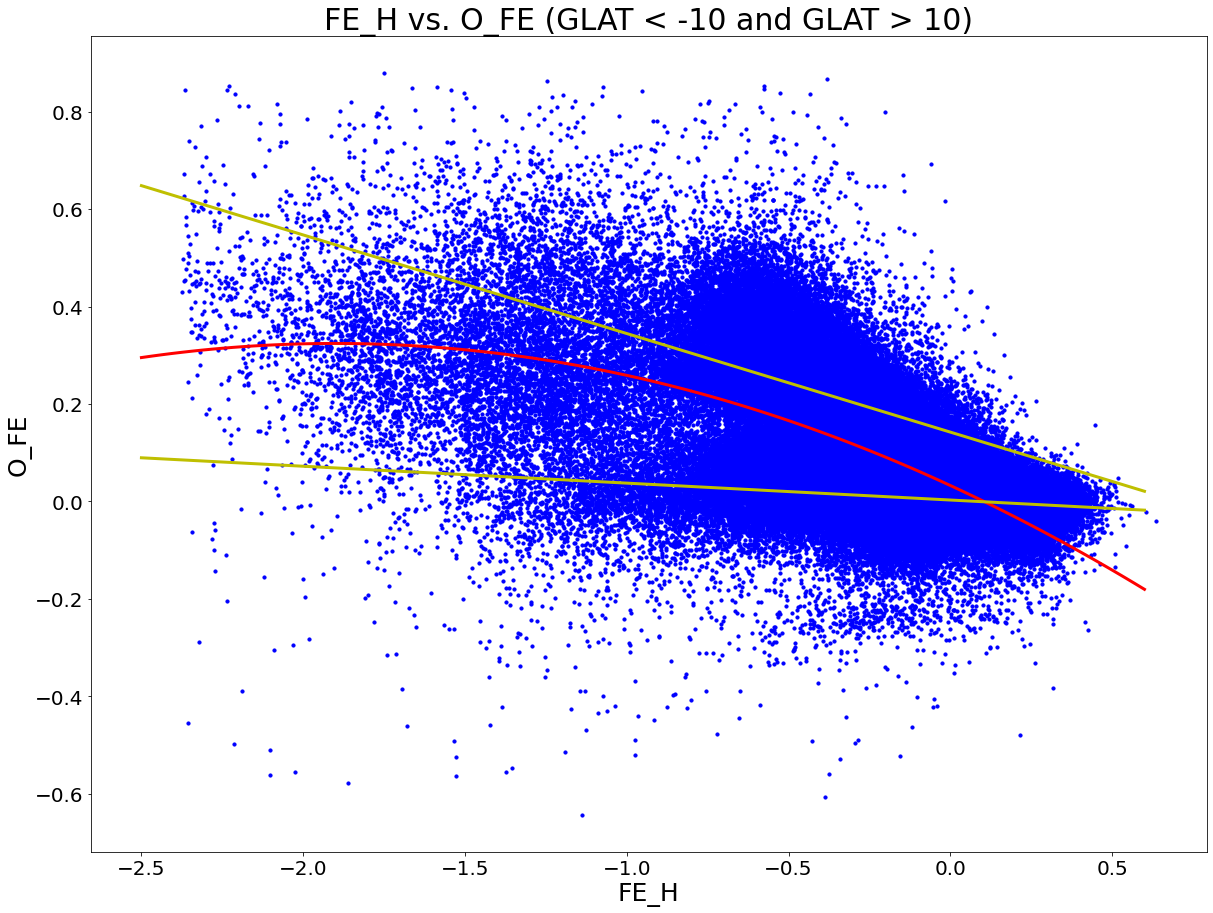

In [4]:
mask_b = (((star['GLAT']) < -10.0) & ((star['O_FE'])>-6000))  | (((star['GLAT']) > 10.0)&((star['O_FE'])>-6000))
mask_b1 = (((star['GLAT']) < -10.0) & ((star['O_FE'])>-6000)&(star['FE_H']>-1.5)&(star['O_FE']<0.1))  | (((star['GLAT']) > 10.0)&((star['O_FE'])>-6000)&(star['FE_H']>-1.5)&(star['O_FE']<0.1))
mask_b2 = (((star['GLAT']) < -10.0) & ((star['O_FE'])>-6000)&(star['FE_H']>-0.5)&(star['O_FE']>0.1))  | (((star['GLAT']) > 10.0)&((star['O_FE'])>-6000)&(star['FE_H']>-0.5)&(star['O_FE']>0.1))



fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][mask_b],star['O_FE'][mask_b],s=10,c='b')

ax.set_xlabel('FE_H', size = 25)
ax.set_ylabel('O_FE', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('FE_H vs. O_FE (GLAT < -10 and GLAT > 10)', size = 30)

#plotting line of best fit, which is going to be a quadratic
xlin = np.linspace(-2.5,0.6,100)
a, b, c = MCFit_3(poly2, star['FE_H'][mask_b], star['O_FE'][mask_b],star['FE_H_ERR'][mask_b],\
                     star['O_FE_ERR'][mask_b],[1,1,1])
ax.plot(xlin, poly2(xlin, np.mean(a),np.mean(b),np.mean(c)), c = 'r', linewidth = 3) 

m1,b1 = MCFit_2(linear,star['FE_H'][mask_b1], star['O_FE'][mask_b1],star['FE_H_ERR'][mask_b1],star['O_FE'][mask_b1],[1,1])
ax.plot(xlin, linear(xlin, np.mean(m1),np.mean(b1)), c = 'y',linewidth=3)

m2,b2 = MCFit_2(linear,star['FE_H'][mask_b2], star['O_FE'][mask_b2],star['FE_H_ERR'][mask_b2],star['O_FE'][mask_b2],[1,1])
ax.plot(xlin, linear(xlin, np.mean(m2),np.mean(b2)), c = 'y',linewidth=3)

plt.show()

a)The paramters are printed above. 

b) The function that fits the data the best is a quadratic, or second degree polynomial. 

c) Yes, there are two populations that can be graphed with a linear fit, as shown above. 

# C)

[ 0.11261723  0.16282375 -0.14860496  0.03148775]
[ 0.11603011  0.16694427 -0.1486155   0.03121239]
[ 0.11727708  0.16909246 -0.14805702  0.03109405]
[ 0.11539286  0.16656309 -0.14811876  0.03121548]
[ 0.11658933  0.16870249 -0.14862161  0.031121  ]
[ 0.11714374  0.167859   -0.14877311  0.03108797]
[ 0.117785    0.16828873 -0.14831255  0.03114311]
[ 0.11509924  0.16543153 -0.14848655  0.03126415]
[ 0.11614511  0.1677896  -0.14838649  0.03105715]
[ 0.11531946  0.16648234 -0.14832497  0.03134996]
[ 0.11125507  0.16282736 -0.14815299  0.03145581]
[ 0.11824749  0.17002834 -0.14853485  0.03109094]
[ 0.11518049  0.16620746 -0.14850857  0.03127669]
[ 0.11688522  0.16619259 -0.14881687  0.03124191]
[ 0.12038272  0.16917231 -0.14939764  0.03104298]
[ 0.11401093  0.16520781 -0.14841818  0.03117784]
[ 0.11659001  0.16698838 -0.14871931  0.03122721]
[ 0.11224367  0.16194045 -0.14893676  0.03152198]
[ 0.11502506  0.1669163  -0.14801394  0.03118796]
[ 0.11651428  0.16730776 -0.1482664   0.03099959]


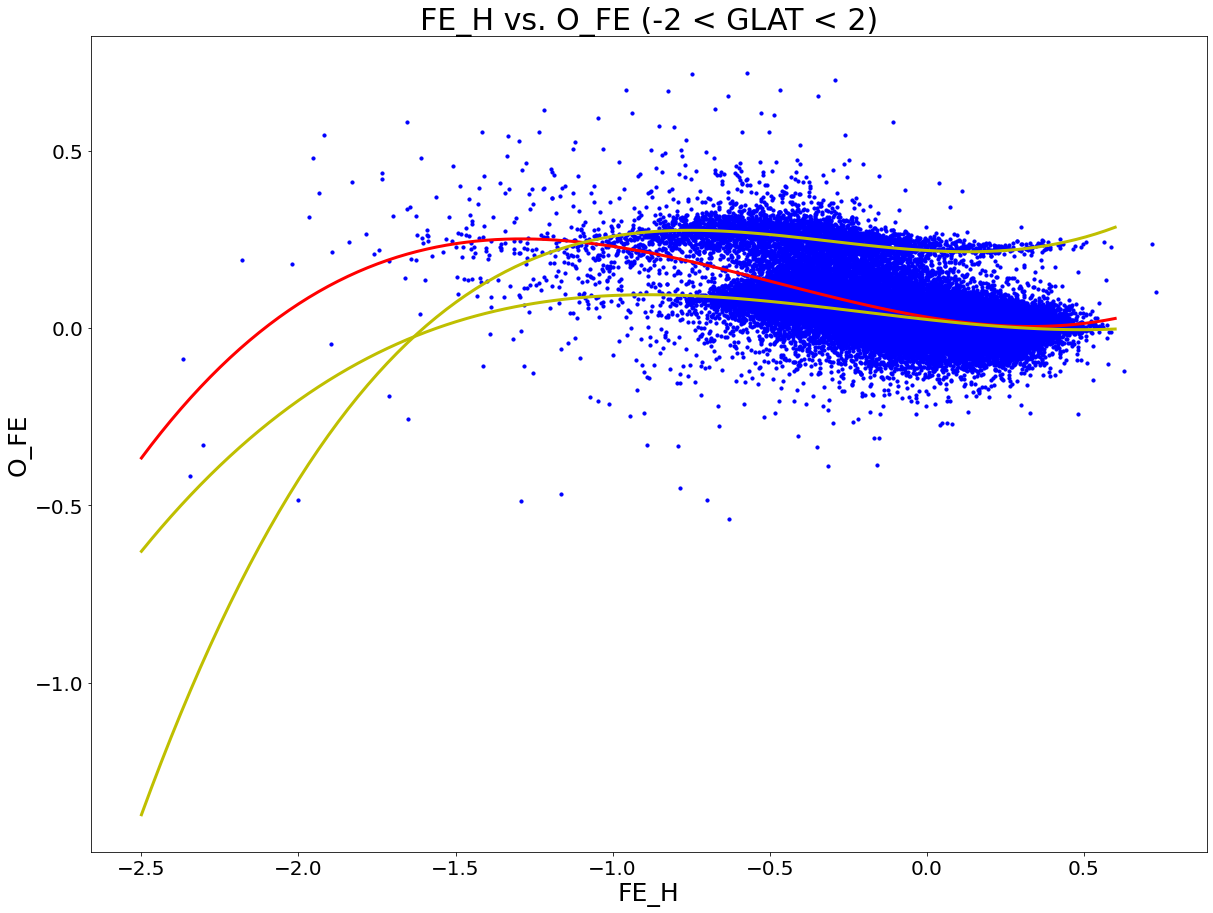

In [5]:
mask_c = (np.absolute(star['GLAT']) < 2.0) & (star['O_FE']>-6000) 
mask_c1 = (np.absolute(star['GLAT']) < 2.0) & (star['O_FE']<.175) & (star['O_FE']>-6000)
mask_c2 = (np.absolute(star['GLAT']) < 2.0) & (star['O_FE']>0.175) & (star['FE_H']>-1.0)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][mask_c],star['O_FE'][mask_c],s=10,c='b')

ax.set_xlabel('FE_H', size = 25)
ax.set_ylabel('O_FE', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('FE_H vs. O_FE (-2 < GLAT < 2)', size = 30)

#plotting line of best fit, which is going to be a 3rd degree polynomial
xlin= np.linspace(-2.5,0.6,100)
a, b, c, d = MCFit_4(poly3, star['FE_H'][mask_c], star['O_FE'][mask_c],star['FE_H_ERR'][mask_c], star['O_FE_ERR'][mask_c],[1,1,1,1])
ax.plot(xlin, poly3(xlin, np.mean(a),np.mean(b),np.mean(c), np.mean(d)), c = 'r', linewidth = 3)

a1, b1, c1, d1 = MCFit_4(poly3, star['FE_H'][mask_c1], star['O_FE'][mask_c1],star['FE_H_ERR'][mask_c1], star['O_FE_ERR'][mask_c1],[1,1,1,1])
ax.plot(xlin, poly3(xlin, np.mean(a1),np.mean(b1),np.mean(c1), np.mean(d1)), c = 'y', linewidth = 3) 

a2, b2, c2, d2 = MCFit_4(poly3, star['FE_H'][mask_c2], star['O_FE'][mask_c2],star['FE_H_ERR'][mask_c2], star['O_FE_ERR'][mask_c2],[1,1,1,1])
ax.plot(xlin, poly3(xlin, np.mean(a2),np.mean(b2),np.mean(c2), np.mean(d2)), c = 'y', linewidth = 3) 

plt.show()

a)The paramters are printed above.

b) The function that fits the data the best is a thrid degree polyomial.

c) Yes, there is a secondary population, but they cannot be matched with a linear function. I have matched both populations with a third degree polynomial, and it details their similar relationship. 

# D)

<ipython-input-1-7e3abc433d82>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


[-3.58140170e+00  4.25221562e-01 -8.96662435e+02  2.65796025e+01]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.01291479e+00  1.12698718e+00 -3.26442912e+03  7.86596441e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1.00000e+00 -3.00000e+03  9.55554e+00]
[-1.00000e+00  1

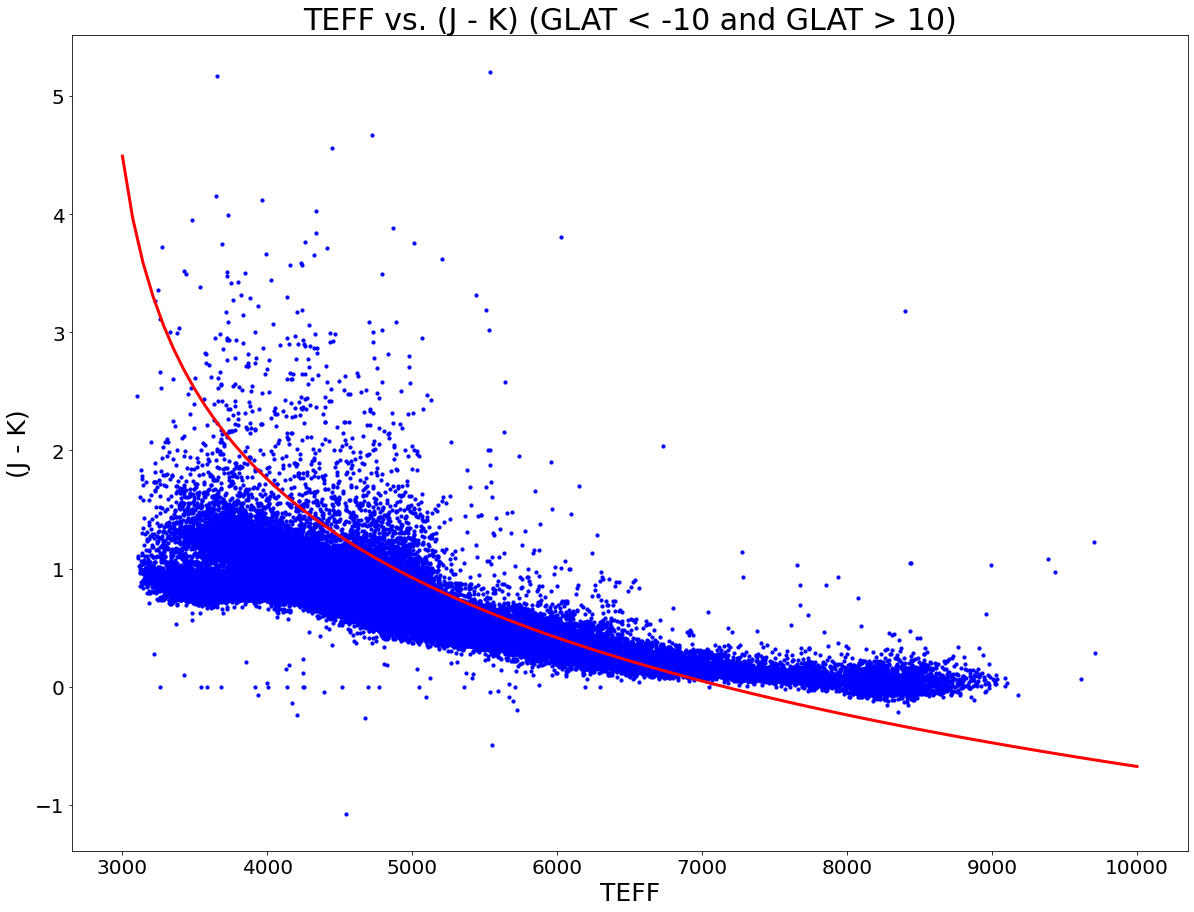

In [6]:
import numpy as np

mask_d = (((star['GLAT']) < -10.0)&(star['TEFF']>0)&((star['J']-star['K'])<4000))  | (((star['GLAT']) > 10.0)&(star['TEFF']>0)&((star['J']-star['K'])<4000))


J_K = star['J'][mask_d]-star['K'][mask_d]
J_K_ERR = np.sqrt(((star['J_ERR'][mask_d])**2)+((star['K_ERR'][mask_d])**2))


fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][mask_d],J_K,s=10,c='b')

ax.set_xlabel('TEFF', size = 25)
ax.set_ylabel('(J - K)', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('TEFF vs. (J - K) (GLAT < -10 and GLAT > 10)', size = 30)

#plotting line of best best, in this case an exponential, 
#but I couldn't get the exponential function to go through the data, so a logfit line will have to do. 
# a logfit will work for the first half, a linear will match the second half

xlin = np.linspace(3000, 10000,100)
a,b,c,d = MCFit_4(logfit, star['TEFF'][mask_d],J_K,star['TEFF_ERR'][mask_d],J_K_ERR,[-1,1,-3000,9.55554])
ax.plot(xlin, logfit(xlin, np.mean(a),np.mean(b),np.mean(c),np.mean(d)), c = 'r', linewidth = 3) 


plt.show()

[ 1.79900229e-04 -1.25751351e+00]
[ 4.33118625e-04 -1.03119955e+00]
[ 7.88957012e-04 -1.77482166e+00]
[-4.24063844e-04  2.13253454e+00]
[ 7.51602881e-04 -4.41296877e+00]
[-6.08679141e-04  5.45268112e+00]
[ 3.72852080e-04 -1.44892717e+00]
[-1.28423686e-03  6.71180742e+00]
[ 1.13123890e-03 -4.06673613e+00]
[-8.42067470e-04  4.09759897e+00]
[-4.80766502e-04  2.44897568e+00]
[-2.37848667e-03  1.16177479e+01]
[-1.09715340e-03  6.79222051e+00]
[-1.20446176e-03  7.01787784e+00]
[-1.24570346e-04  1.41337503e+00]
[ 2.9112128e-04 -1.2630405e+00]
[-1.37847081e-03  7.92605066e+00]
[ 1.26118795e-03 -5.42864475e+00]
[-4.46726654e-04  2.83502696e+00]
[ 1.53471908e-03 -7.10412299e+00]
[ 6.52086658e-04 -2.74440119e+00]
[ 1.16634645e-03 -5.78689286e+00]
[-2.05185401e-03  1.12800831e+01]
[ 5.41530152e-04 -3.13389987e+00]
[-1.25999715e-03  7.43905379e+00]
[ 4.14091371e-04 -9.44747040e-01]
[-6.48706938e-04  3.06050827e+00]
[-2.44636988e-04  1.54226961e+00]
[ 2.37992370e-04 -6.99314491e-01]
[ 6.45646166e-04

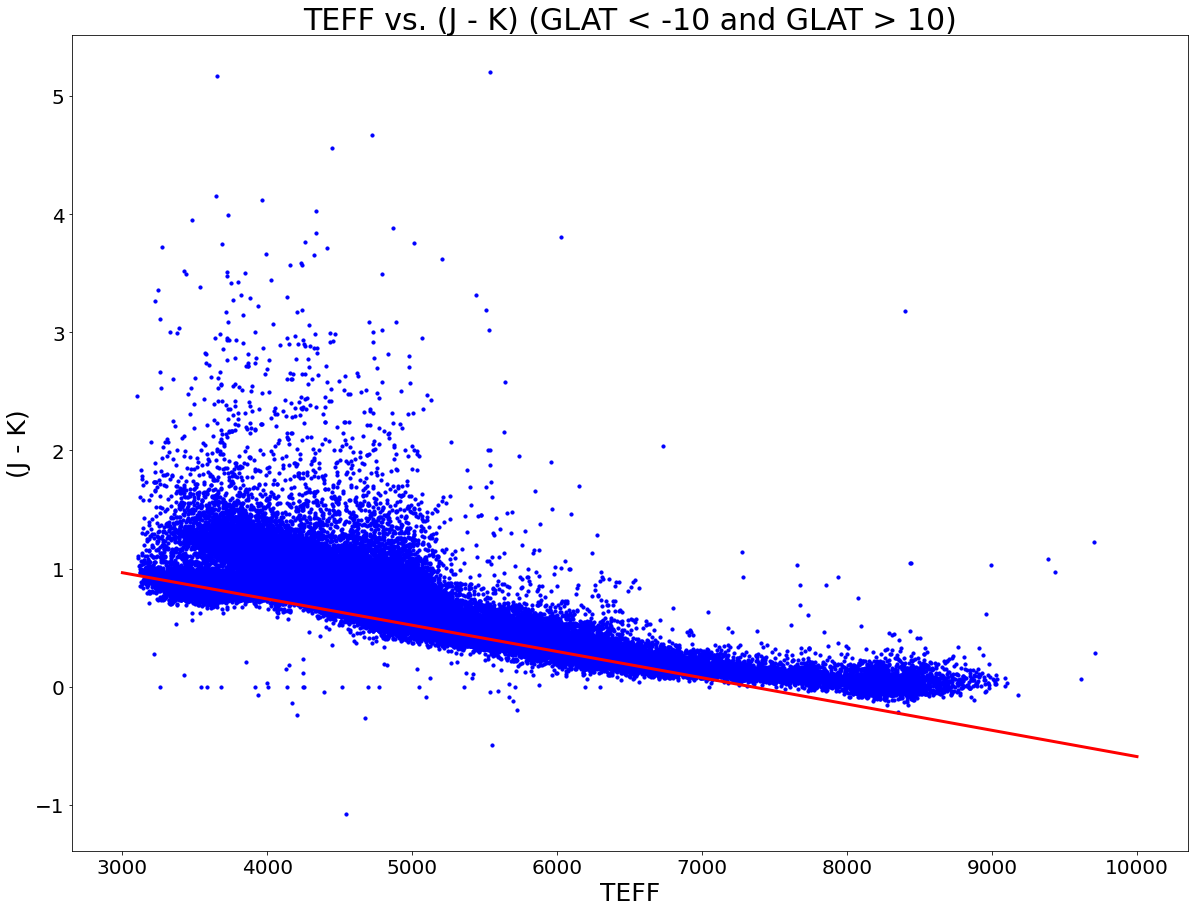

In [7]:
import numpy as np

mask_d = (((star['GLAT']) < -10.0)&(star['TEFF']>0)&((star['J']-star['K'])<4000))  | (((star['GLAT']) > 10.0)&(star['TEFF']>0)&((star['J']-star['K'])<4000))
mask_d1 = (((star['GLAT']) < -10.0)&(star['TEFF']>0)&((star['J']-star['K'])<2))  | (((star['GLAT']) > 10.0)&(star['TEFF']>0)&((star['J']-star['K'])<2))


J_K = star['J'][mask_d]-star['K'][mask_d]
J_K_ERR = np.sqrt(((star['J_ERR'][mask_d])**2)+((star['K_ERR'][mask_d])**2))

J_K1 = star['J'][mask_d1]-star['K'][mask_d1]
J_K_ERR1 = np.sqrt(((star['J_ERR'][mask_d1])**2)+((star['K_ERR'][mask_d1])**2))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][mask_d],J_K,s=10,c='b')

ax.set_xlabel('TEFF', size = 25)
ax.set_ylabel('(J - K)', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('TEFF vs. (J - K) (GLAT < -10 and GLAT > 10)', size = 30)

#plotting line of best best, in this case an exponential, 
#but I couldn't get the exponential function to go through the data, so a logfit line will have to do. 
# a logfit will work for the first half, a linear will match the second half

xlin = np.linspace(3000, 10000,100)
a,b = MCFit_2(linear, star['TEFF'][mask_d1],J_K1,star['TEFF_ERR'][mask_d1],J_K_ERR1,[1,1])
ax.plot(xlin, linear(xlin, np.mean(a),np.mean(b)), c = 'r', linewidth = 3) 


plt.show()

a) The paramters are printed above.

b) The function that would fit the scatter plot the best would be an exonential function. However, I was unable to get the function to cooperate with the code. There were multiple overflow errors. I have instead subsituted a log fit and linear fit for the two halfs of the array. 

c) No, there is not a secondary population that can be mapped with a linear function. 

# E)

[ 4.82974679e+01  2.29586098e-02  8.10589897e-01 -2.92478610e+00]
[ 4.83007209e+01  2.29583653e-02  8.10693966e-01 -2.92723072e+00]
[ 4.83027830e+01  2.29573616e-02  8.10820079e-01 -2.92266121e+00]
[ 4.83063982e+01  2.29565385e-02  8.10831592e-01 -2.91908237e+00]
[ 4.83034711e+01  2.29583949e-02  8.10575530e-01 -2.92472019e+00]
[ 4.83009742e+01  2.29565629e-02  8.10923325e-01 -2.92283904e+00]
[ 4.83073671e+01  2.29555685e-02  8.11003734e-01 -2.91906906e+00]
[ 4.83071639e+01  2.29558762e-02  8.10933340e-01 -2.91941126e+00]
[ 4.83082779e+01  2.29549114e-02  8.11106999e-01 -2.91900795e+00]
[ 4.83048272e+01  2.29585701e-02  8.10606619e-01 -2.92487754e+00]
[ 4.83017157e+01  2.29594662e-02  8.10408165e-01 -2.92534200e+00]
[ 4.83035882e+01  2.29572725e-02  8.10811406e-01 -2.92355476e+00]
[ 4.83012340e+01  2.29565996e-02  8.10875229e-01 -2.92232303e+00]
[ 4.83102358e+01  2.29582701e-02  8.10577214e-01 -2.92109418e+00]
[ 4.83000019e+01  2.29574904e-02  8.10882995e-01 -2.92392065e+00]
[ 4.830327

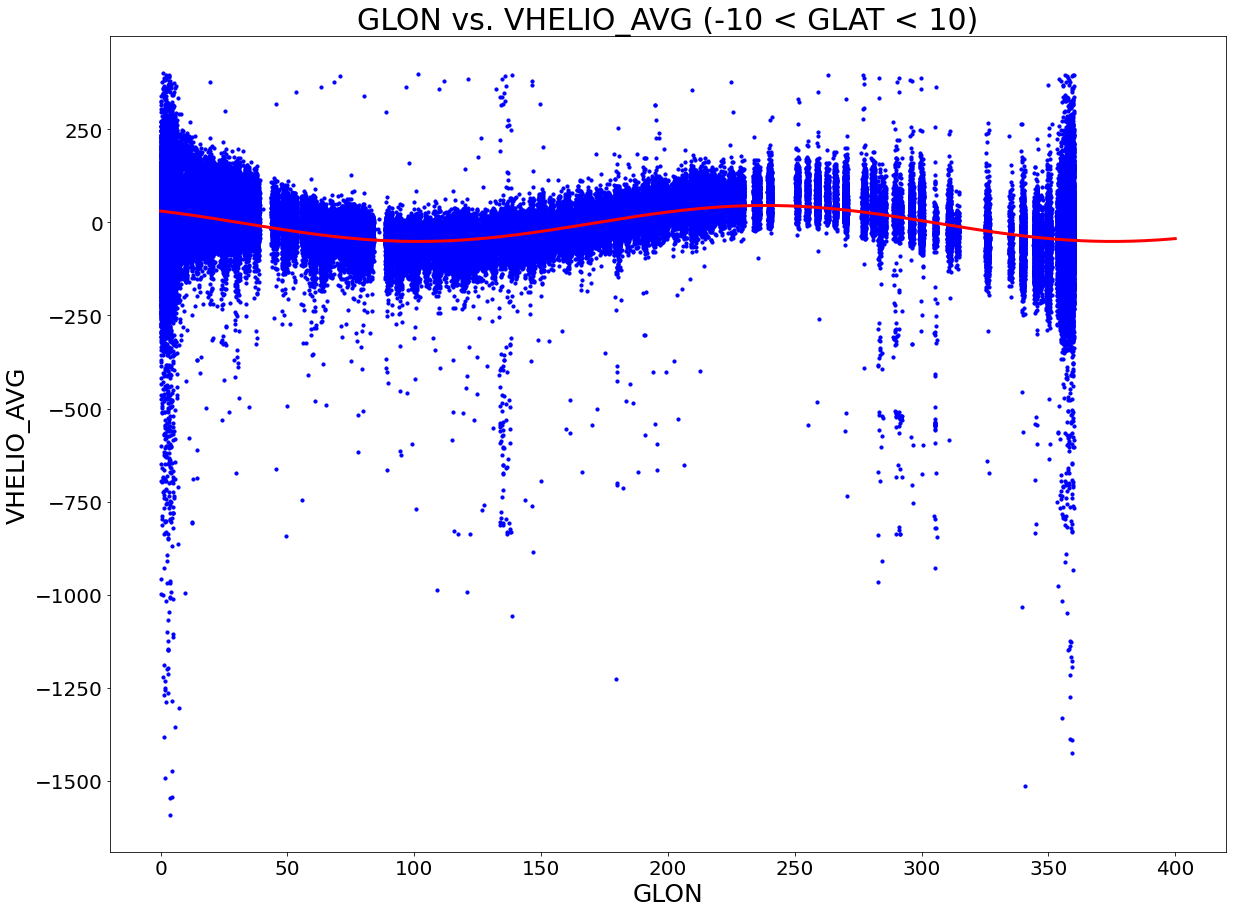

In [8]:
#mask_e = (np.absolute(star['GLAT'])<10) & (star['VHELIO_AVG']<0.4)
mask_e = (star['GLAT']<10) &(star['GLAT']> -10)& (star['VHELIO_AVG']<400)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][mask_e],star['VHELIO_AVG'][mask_e],s=10,c='b')

ax.set_xlabel('GLON', size = 25)
ax.set_ylabel('VHELIO_AVG', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('GLON vs. VHELIO_AVG (-10 < GLAT < 10)', size = 30)

#guasian
xlin = np.linspace(0,400,400)
a, b,c,d= MCFit_4(cosfit, star['GLON'][mask_e], star['VHELIO_AVG'][mask_e],0, star['VERR'][mask_e],[100,1/50,1,1])
ax.plot(xlin, cosfit(xlin, np.mean(a),np.mean(b),np.mean(c),np.mean(d)), c = 'r', linewidth = 3) 

plt.show()

a) The paramters are printed above.

b) The function that fits the data best is a cosine function. 

c) No, it does not seem that there is a linear secondary population. However, there are spikes in the VHELIO_AVG at point where GLON = 0, 140, 270, 280, 310, and 360, and they show greater ranges of VHELIO_AVG. 

# F)

<ipython-input-1-7e3abc433d82>:23: RuntimeWarning: divide by zero encountered in log
  return a*np.log(b*x + c) + d
<ipython-input-1-7e3abc433d82>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.  -4. 200.]
[-60.   1.

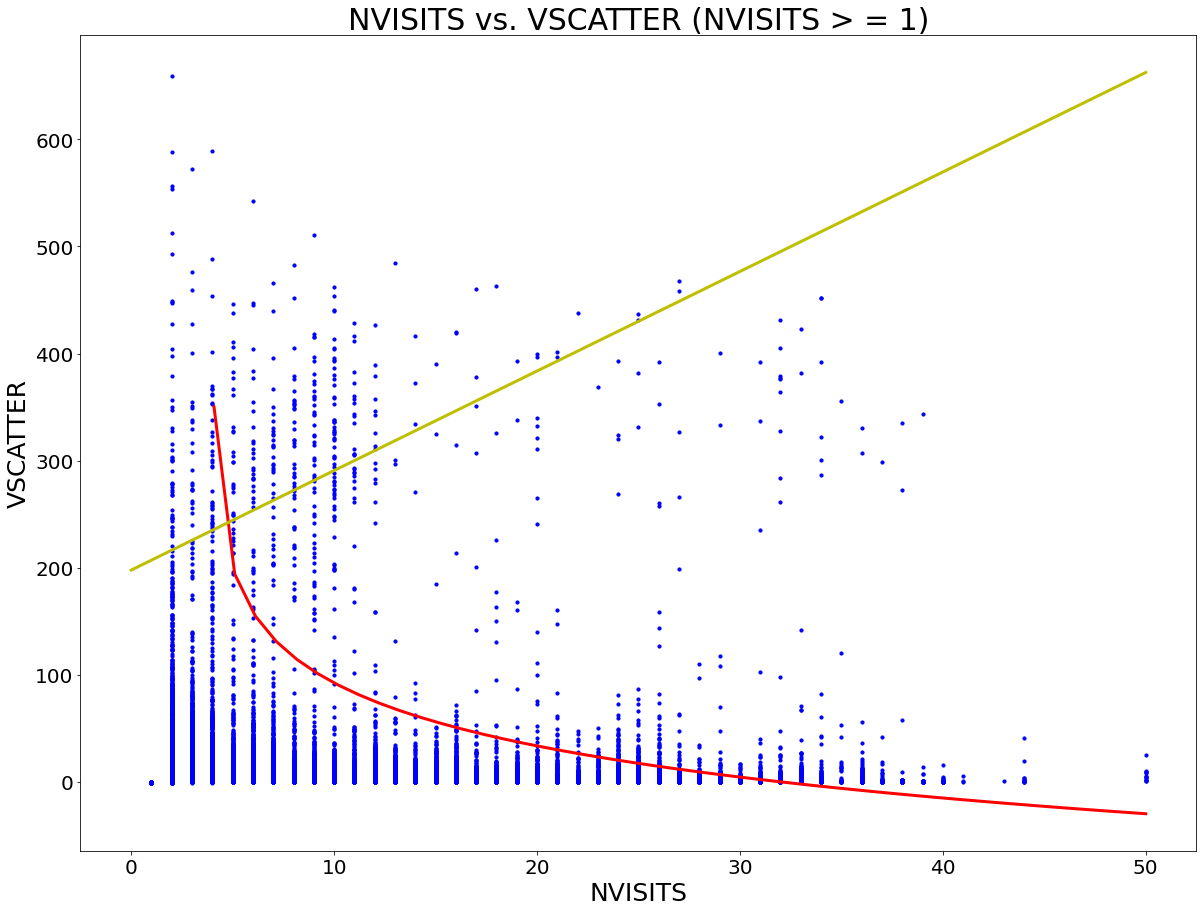

In [9]:
mask_f = star['NVISITS']>= 1
mask_f1 = (star['NVISITS']>= 1) &(star['VSCATTER']>100)&(star['NVISITS']<15)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['NVISITS'][mask_f],star['VSCATTER'][mask_f],s=10,c='b')

ax.set_xlabel('NVISITS', size = 25)
ax.set_ylabel('VSCATTER', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('NVISITS vs. VSCATTER (NVISITS > = 1)', size = 30)

xlin = np.linspace(0,50,50)

a,b,c,d = MCFit_4(logfit, star['NVISITS'][mask_f],star['VSCATTER'][mask_f],0,star['VERR'][mask_f],[-60,1,-4,200])
ax.plot(xlin, logfit(xlin, np.mean(a),np.mean(b),np.mean(c),np.mean(d)), c = 'r', linewidth = 3)

m,z = MCFit_2(linear, star['NVISITS'][mask_f1],star['VSCATTER'][mask_f1],0,star['VERR'][mask_f1],[1,1])
ax.plot(xlin, linear(xlin, np.mean(m),np.mean(z)), c = 'y', linewidth = 3)


plt.show()

a)The paramters are printed above.

b) The best fit function would be a gausian curve to display the distribution. I could nto make it work, so I calculated the best fit log function. 

c) Yes, there is a linear secondary population that is notated above. 

# G)

[0.0097564  0.02069349]
[0.01014797 0.02079207]
[0.01002041 0.0208296 ]
[0.00995295 0.02075784]
[0.009951   0.02066819]
[0.00925054 0.02063121]
[0.0100453  0.02072533]
[0.00985922 0.02065012]
[0.00982518 0.02072546]
[0.00984152 0.02068867]
[0.00949328 0.02056553]
[0.00954629 0.0206883 ]
[0.0098744  0.02068999]
[0.00970721 0.02068764]
[0.00936355 0.02068041]
[0.01011711 0.02074463]
[0.0098287  0.02074252]
[0.00926987 0.02053364]
[0.00973203 0.02067123]
[0.00959293 0.02069467]
[0.01026415 0.02075991]
[0.00977195 0.02067985]
[0.00988873 0.02070543]
[0.00976027 0.02068987]
[0.00910802 0.02067095]
[0.00961361 0.02069413]
[0.00968381 0.02067913]
[0.00974883 0.02068579]
[0.00993419 0.02070614]
[0.00959367 0.02073811]
[0.00947661 0.02070228]
[0.00966614 0.0206728 ]
[0.00949632 0.02068784]
[0.00944849 0.02068157]
[0.00983332 0.02069886]
[0.00982952 0.02069647]
[0.01008605 0.02076463]
[0.00980012 0.02063897]
[0.00994463 0.02066557]
[0.00972246 0.0207222 ]
[0.0097682  0.02070037]
[0.01045821 0.02

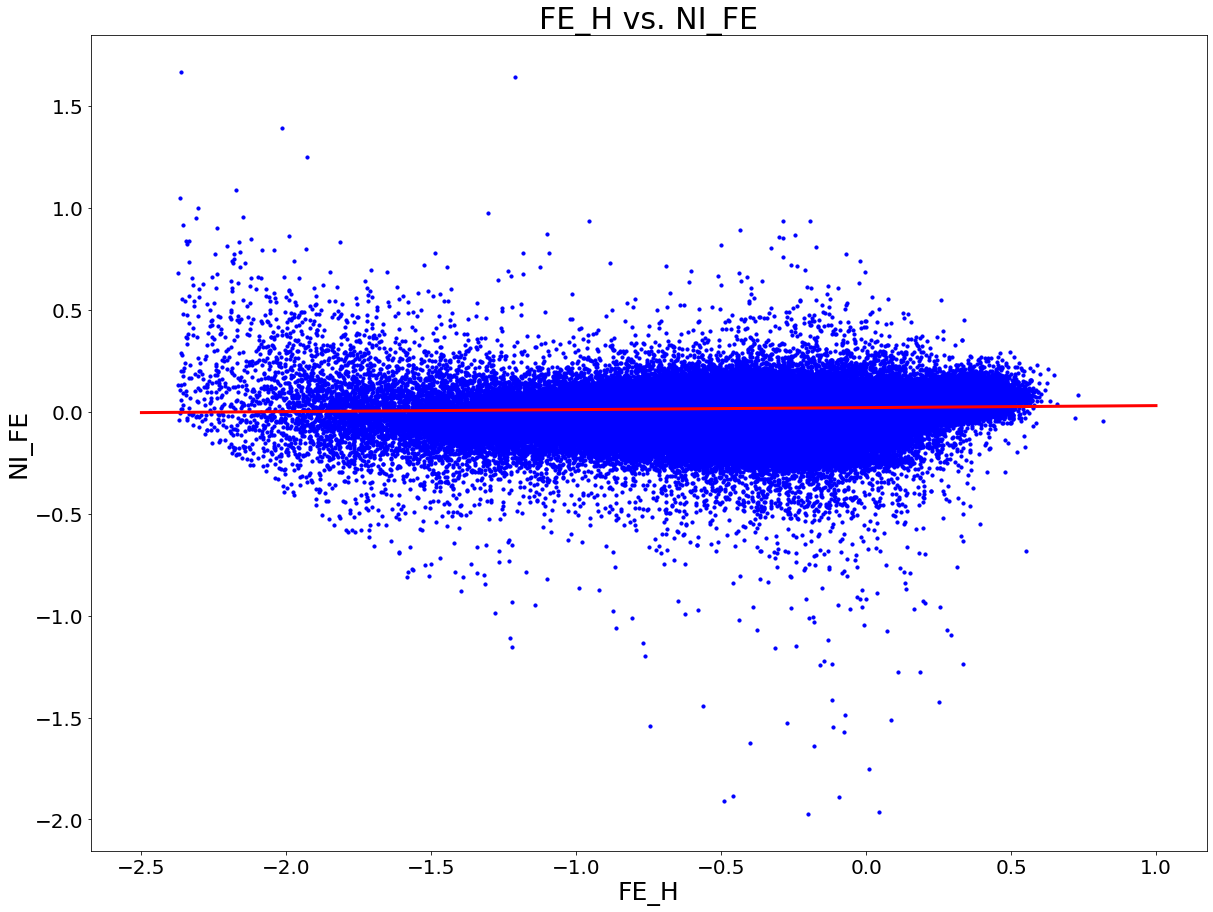

In [10]:
mask_g = star['NI_FE']>-1000

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][mask_g],star['NI_FE'][mask_g],s=10,c='b')

ax.set_xlabel('FE_H', size = 25)
ax.set_ylabel('NI_FE', size = 25)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('FE_H vs. NI_FE', size = 30)

xlin = np.linspace(-2.5,1,100)
m,b = MCFit_2(linear,star['FE_H'][mask_g], star['NI_FE'][mask_g],star['FE_H_ERR'][mask_g],star['NI_FE_ERR'][mask_g],[1,1])
ax.plot(xlin, linear(xlin, np.mean(m),np.mean(b)), c = 'r',linewidth=3)  

plt.show()

a) The paramters are printed above.

b) The function that best fits the data is a linear line. 

c) No, it does not seem as though there is a secondary linear population.